 <font size="6"> **Chapter 6:  Matrix Computing, Trial-and-Error Searching and Data Fitting.** </font>

# Matrix Computing, Trial-and-Error Searching and Data Fitting

## Trial-and-Error Root Finding

### Introduction

Trial-and-error may not sound very precise, but it is in fact used to solve problems where analytic solutions do not exist, or are not practical. 

In trial-and-error algorithms, decisions on what path to follow are made based on the current values of variables, and the program quits only when it thinks it has solved the problem. 

Trial-and-error root finding looks for a value of $x$ for which:

$f(x) \simeq 0$. 

To put the zero on the right-hand side is conventional, since any equation can be written in this form, e.g.

$ 10 \sin (x) = 3x^3 \Rightarrow 10 \sin(x) - 3x^3 = 0$.

Generally, the procedure starts with a *guessed* value for $x$, substitutes that guess into $f(x)$ (the "trial"), and then sees how far the left-hand side is from zero.

The program then changes $x$ based on the error, and tries out a new guess in $f(x)$. 

The procedure continues until $f(x) \simeq 0$ to some desired level of precision, or until the changes in $x$ are insignificant, or if the search seems endless. 


### Trial-and-error Roots via Bisection

The most elementary example of trial-and-error root finding is the *bisection algorithm*. It is reliable, but slow.

If you know some interval in which $f(x)$ changes sign, then the bisection algorithm will always converge to the root by finding progressively smaller and smaller intervals within which the zero lies. 

The bisection algorithm can be described as follows:
- Start with two values of $x$ between which we know a zero occurs. For example, you may determine these by making a graph, or by stepping through different values of $x$ and looking for a sign change. 
- Let's then say that $f(x)$ changes sign from $x_1$ to $x_2$, e.g. if $f(x_1) < 0$ then $f(x_2) > 0$. The bisection algorithm chooses a new $x$ as the bisection of the interval (i.e. the mid point!), and selects as its new interval the half in which the sign change occurs.
- The process continues until the value of $f(x)$ is less than a predefined level of precision, or until a predefined (large) number of subdivisions occurs.

Let's implement the bisection algorith and use it in a concrete example!

### Example 6.1: Temperature Dependence of Magnetization. 

The magnetization of $N$ spin-1/2 particles, each with magnetic moment $\mu$ at a temperature $T$, in an external magnetic field $B$ is given by:

$m(t) = \tanh\left(\frac{ m(t) }{ t } \right)$,

where $m(t)$ is the "reduced" magnetization and $t$ is the "reduced" temperature.                                  

[For the sake of completeness: $m(T) = M(T)/(N\mu)$, with $M$ being the magnetization, $t=T/T_c$, with $T$ being the temperaturem, and $T_c = N \mu^2 \lambda / k_B$ the Curie temperature.]

Our goal is to find the reduced magnetization $m$, for various reduced temperatures: $t=0.5, 1.0, 2.0$. We will use the bisection method to solve the *transcendetal* equation for $m(t)$. 

We should start by plotting the function that we wish to find the zero of, i.e. $f(m) = \tanh(m/t) - m$, to get an indication of the location of the zeros. It will be clear that there are no zeros for some of the values. For those that there will be zeros, let's find the solution to a precision of $\mathcal{O}(10^{-10})$. Let's also print the number of iterations necessary to achieve this. 

## Newton-Raphson Searching

The Newton-Raphson algorithm finds approximate roots of equations of the same type, $f(x)=0$, more quickly than the bisection method.

The algorithm is the equivalent of drawing a straight line $f(x) \simeq mx + b$, tangent to the curve at an $x$ value for which $f(x) \simeq 0$ and then using the intrercept of the line with the $x$-axis at $x=-b/m$ as an improved guess for the root. 

If the curve was in fact a straight line, the answer would be exact. Otherwise it is a good approximation if the guess is close enough to the root for $f(x)$ to be nearly linear. 

The process continues until some set level of precision is reached. 

If a guess is in a region where $f(x)$ is nearly linear, then the convergence is much more rapid than for the bisection algorithm. 

The formulation of the Newton-Raphson algorithm is as follows:

- Start with a guess $x_0$,
- Find the tangent line to $f(x)$ at $x_0$ via:
$y = f(x_0) + (x-x_0) \left. \frac{ \mathrm{d} f}{\mathrm{d} x} \right|_{x=x_0}$.
- This line crosses the axis at: $f(x_0) + (x-x_0) \left. \frac{ \mathrm{d} f}{\mathrm{d} x} \right|_{x=x_0} = 0$.
- Solving for $x$: $x= x_0 - f(x_0)/\left. \frac{ \mathrm{d} f}{\mathrm{d} x} \right|_{x=x_0}$. This will be the new guess.
- The procedure is repeated until some level of precision is reached, or a maximum number of evaluations.


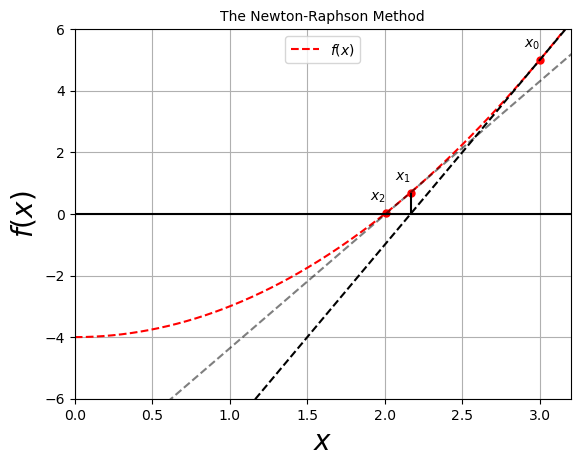

In [27]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# Now plot! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$f(x)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'The Newton-Raphson Method', fontsize=10) # set the title 

# construct the variable: 
x = np.linspace(0,3.5,350)
# and the function:
f = x**2 - 4

ax.plot(x, f, label='$f(x)$', ls='--', color='red')
x0 = 3.0
y0 = 3.0**2 - 4
x1 = x0 - (x0**2-4)/(2 * x0)
y1 = x1**2 - 4
x2 = x1 - (x1**2-4)/(2 * x1)
y2 = x2**2 - 4

ax.plot(x0, y0, markersize=5, marker='o', color='red')
ax.plot(x1, y1, markersize=5, marker='o', color='red')
ax.plot(x2, y2, markersize=5, marker='o', color='red')
ax.text(x0-0.1,y0+0.4,"$x_0$")
ax.text(x1-0.1,y1+0.4,"$x_1$")
ax.text(x2-0.1,y2+0.4,"$x_2$")

y = y0 + (x-x0) * 2*x0
y2 = y1 + (x-x1) * 2*x1

ax.plot(x,y,ls='--', color='black')
ax.plot(x,y2,ls='--', color='black', alpha=0.5)

# draw horizontal line passing through zero
ax.hlines(xmin=0, xmax=3.2,y=0,color='black')

# draw first vertical line to indicate x_1:
ax.vlines(ymin=0, ymax=y1,x=x1,color='black')

# set the limits:
ax.set_xlim(0,3.2)
ax.set_ylim(-6,6)

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

ax.grid() # show the grid. 

plt.show() # show the plot here

It's clear that the Newton-Raphson algorithm requires the evaluation of the derivative of the function at the guess point $x_0$, i.e. $\left. \frac{ \mathrm{d} f}{\mathrm{d} x} \right|_{x=x_0}$. 

In many cases you may have an analytic expression for the derivative, and it can be built into the algorithm. 

However, it is simpler to use a numerical approximation to the derivative, e.g. using the forward-difference derivative:

$  \frac{ \mathrm{d} f}{\mathrm{d} x} \approx \frac{ f(x+\delta x) - f(x) } { \delta x}$. 

A central-difference derivative can also be used, but it would require additional evaluations of the function. 

## Newton-Raphson with Backtracking

Potential problems may arise while performing Newton-Raphson searching: 

- The search can take us to an $x$ value where the function has a local minimum or maximum, i.e.: $\mathrm{d}f/\mathrm{d} x = 0$. This would lead to a horizontal tangent and then the next guess would be $x \rightarrow \infty$, which is hard to return from!
- The search can fall into an infinite loop surrounding the zero without ever getting there.

The problem in both cases is that the initial guess is not close enough to a region where the function is approximately linear. This is why a good plot may help produce a good first guess.

When the above occur, you may need to start your initial guess ($x_0$) at a different point in an effort not to fall in these traps, or try *backtracking*.

**Backtracking**: in cases where the new guess leads to an *increase* in the magnitude of the function, i.e. $|f(x_0 + \Delta x)|^2 > |f(x_0)|^2$, you can backtrack somewhat and try a smaller step, say $x_0 + \Delta x / 2$. If the magnitude still increases, then backtrack some more, say by trying $x_0 + \Delta x / 4$, and so on. 

An alternative solution: start with a bisection search algorithm and switch to faster Newton-Raphson when you get closer to zero. 

### Example 6.2: Newton-Raphson applied to the Temperature Dependence of Magnetization. 

Implement the Newton-Raphson search algorithm to find the root of the Transcendental equation given in Example 6.1 for $t=0.5$ and a precision of $\mathcal{O}(10^{-10})$. Use a central-difference derivative while implementing the algorithm and print the number of iterations.

## Matrix Computing

### Why Matrix Computing?

Physical systems are often modeled by systems of simultaneous equations that can be written in matrix form. 

As models are made more realistic, matrices become correspondingly bigger. It is therefore important to use a good linear algebra library. 

"Industrial-strength" subroutines for matrix computing can be found in well-established scientific libraries. They can be an order of magnitude or more faster than elementary methods found in linear algebra texts. 

These packages are usually designed to minimize the round-off error and they are robust, i.e. they have a high chance of being successful for a broad class of problems. 

The question is, when is a matrix large enough to require the use of a library routine? A rule of thumb is: "when you have to wait for the answer!". 

Note that GPUs (Graphics Processing Units) can perform matrix algebra very efficiently, since they can execute many commands in parallel. This requires programming in specific frameworks, but it's good to keep in mind at this point. 

### Classes of Matrix Problems

The most basic matrix problem: a system of linear equations, e.g.:

$\mathbf{A} \vec{x} = \vec{b}$,

where $\mathbf{A}$ is an $N\times N$ matrix, $\vec{x}$ is an *unknown* vector of length $N$, and $\vec{b}$ is a known vector of length $N$. 

The obvious way to solve this: determine the inverse of $\mathbf{A}$, $\mathbf{A}^{-1}$, and multiply both sides of the equation by it to obtain $\vec{x}$:

$ \vec{x} = \mathbf{A}^{-1} \vec{b}$. 

Calculating the inverse of a matrix is a standard in a matrix subroutine library. 

A more efficient way to solve the linear equation is by Gaussian elimination or lower-upper (LU) decomposition. Both of these yield $\vec{x}$ without $\mathbf{A}^{-1}$. (However, sometimes you may want the inverse of a matrix.)

Another form of matrix problems that is frequently encountered is:

$\mathbf{A} \vec{x} = \lambda \vec{x}$, 

with an unknown vector $\vec{x}$ and an unknown parameter $\lambda$. This is an *eigenvalue problem*. Solutions only exist for certain (if any) values of $\lambda$. To find a solution, we can use the identity matrix, $\mathbf{I}$, to rewrite the equation as follows:

$[\mathbf{A} - \lambda \mathbf{I}]\vec{x} = 0$.

which yields a non-trivial solution only if the determinant of $[\mathbf{A} - \lambda \mathbf{I}]$ is zero, i.e.:

$\det[\mathbf{A} - \lambda \mathbf{I}] = 0$.

This is known as the "secular equation". The values of $\lambda$ that satisfy this equation are the eigenvalues of the eigenvalue equation. 

The traditional way to solve the eigenvalue problem for both eigenvalues and eigenvectors is by *diagonalization* via a transformation matrix $\mathbf{U}$: 

$\mathbf{U} \mathbf{A} (\mathbf{U}^{-1} \mathbf{U})\vec{x} = \lambda \mathbf{U} \vec{x}$,

$(\mathbf{U} \mathbf{A} \mathbf{U}^{-1}) \mathbf{U}\vec{x} = \lambda \mathbf{U} \vec{x}$,

where $\mathbf{U} \mathbf{A} \mathbf{U}^{-1} \equiv \mathbf{D}$ is a diagonal matrix: 

$ \mathbf{D} = \mathbf{U} \mathbf{A} \mathbf{U}^{-1} = \left(\begin{array}{ccccc} 
\lambda_1' & 0 & 0 & ... & 0\\
0 & \lambda_2' & 0 & ... & 0\\
0 & 0 & \lambda_3' & ... & 0\\
0 & 0 & 0 & ... & \lambda_N'
\end{array}\right)$,

whose diagonal entries are the eigenvalues, corresponding to eigenvectors:

$\vec{x}_i = \mathbf{U}^{-1} \hat{\vec{e}}_i$, 

i.e. the eigenvectors are the columns of the matrix $\mathbf{U}^{-1}$. 

### Math Recap: Matrix Multiplication, Inverses and Determinants

Matrix Multiplication: 

To multiply two matrices $\mathbf{A}$ and $\mathbf{B}$:

$ \mathbf{A} =  \left(\begin{array}{ccc} 
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{array}\right)$,

$ \mathbf{B} =  \left(\begin{array}{ccc} 
b_{00} & b_{01} & b_{02} \\
b_{10} & b_{11} & b_{12} \\
b_{20} & b_{21} & b_{22}
\end{array}\right)$,

then:

$\mathbf{A}\mathbf{B} = \left(\begin{array}{ccc} 
a_{00} b_{00} + a_{01}b_{10} + a_{02} b_{20} & a_{00} b_{01} + a_{01}b_{11} + a_{02} b_{21} & a_{00} b_{02} + a_{01}b_{12} + a_{02} b_{22} \\
a_{10} b_{00} + a_{11}b_{10} + a_{12} b_{20} & a_{10} b_{01} + a_{11}b_{11} + a_{12} b_{21} & a_{10} b_{02} + a_{11}b_{12} + a_{12} b_{22} \\
a_{20} b_{00} + a_{21}b_{10} + a_{22} b_{20} & a_{20} b_{01} + a_{21}b_{11} + a_{22} b_{21} & a_{20} b_{02} + a_{21}b_{12} + a_{22} b_{22} \\
\end{array}\right)$,

[See https://www.geogebra.org/m/ETHXK756 for an animation!]

Matrix Determinants:

The determinant of a matrix $ \mathbf{A} =  \left(\begin{array}{ccc} 
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{array}\right)$,

is given by:

$\det[A] = a_{00} (a_{11} a_{22} - a_{21} a_{12}) - a_{01} ( a_{01} a_{22} - a_{20} a_{12} ) - a_{02} ( a_{10} a_{21} - a_{20} a_{11} )$

Matrix Inversion (Cramer's rule):

To invert the matrix $\mathbf{A}$ as defined above we first need the determinant and the matrix of cofactors: 

$\mathbf{C} = \left(\begin{array}{ccc} 
a_{11} a_{22} - a_{21} a_{12} & a_{20} a_{12} - a_{10} a_{22} & a_{10} a_{21} - a_{20} a_{11} \\
a_{21} a_{02} - a_{01} a_{22} & a_{00} a_{22} - a_{20} a_{02} & a_{20} a_{01} - a_{00} a_{21} \\
a_{01} a_{12} - a_{11} a_{02} & a_{20} a_{02} - a_{00} a_{22} & a_{00} a_{11} - a_{10} a_{01}
\end{array}\right)$,

and then the inverse is given by:

$\mathbf{A}^{-1} = \frac{1}{\det[A]} \mathbf{C}^T$, where the superscript $T$ denotes a transposition, i.e. an exchange of rows and columns.



### Example 6.3: In this problem we will find the inverse of a 3x3 matrix *analytically* and show via direct matrix multiplication that it indeed gives back the identity matrix. 

(a) Find the determinant of the matrix: 

$ \mathbf{A} =  \left(\begin{array}{ccc} 
+4 & -2 & +1 \\
+3 & +6 & -4 \\
+2 & +1 & +8
\end{array}\right)$.

(b) Find the inverse of $\mathbf{A}$. 

(c) Check that the inverse indeed satisfies $\mathbf{A}^{-1} \mathbf{A} = \mathbf{I}$.  

### Math Recap: Solving Eigenvalue Problems

To find the eigenvalues of a matrix we first subtract $\lambda$ from its diagonal, take the determinant and set it to zero. We then solve the resulting characteristic equation.

E.g. for a 2x2 matrix,

$ \mathbf{A} =  \left(\begin{array}{cc} 
a_{00} & a_{01} \\
a_{10} & a_{11} \\
\end{array}\right)$,

the characteristic equation is: 

$\det\left(\begin{array}{cc} 
a_{00} - \lambda & a_{01} \\
a_{10} & a_{11} - \lambda \\
\end{array}\right) = 0 $

or: 

$(a_{00} - \lambda) (a_{11} - \lambda) - a_{01} a_{10} = 0$

To find the eigenvectors, i.e. the vectors that satisfy:

$\mathbf{A} \vec{x}_i = \lambda_i \vec{x}_i$, where $\lambda_i$ is the $i$-th eigenvalue, we can write: 

$\vec{x}_i = \left(\begin{array}{c} 
x_i \\
y_i \\
\end{array}\right) $

and then operate with $\mathbf{A} - \lambda_i \mathbf{I}$ 

$\mathbf{A} -  \lambda_i \mathbf{I} = \left(\begin{array}{cc} 
a_{00} - \lambda_i & a_{01} \\
a_{10} & a_{11} - \lambda_i \\
\end{array}\right) $:


$\left(\begin{array}{cc} 
a_{00} - \lambda_i & a_{01} \\
a_{10} & a_{11} - \lambda_i \\
\end{array}\right) \left(\begin{array}{c} 
x_i  \\
y_i  \\
\end{array}\right)  = \left(\begin{array}{c} 
0  \\
0  \\
\end{array}\right) $, to get:

$(a_{00} - \lambda_i) x_i + a_{01} y_i = 0$

and:

$a_{10} x_i + (a_{11} - \lambda_i) y_i = 0$, 

allowing us to find relations between $x_i$ and $y_i$, i.e. the components of the $i$-th eigenvector. The eigenvectors can then be normalized to unity. 

Let's find the eigenvectors and eigenvalues in a concrete example. 

### Example 6.4: Find the eigenvalues and eigenvectors of the matrix:

$\mathbf{A} = \left(\begin{array}{cc} 
\alpha & \beta \\
-\beta & \alpha \\
\end{array}\right)$

### Example 6.5: Given that $\lambda_1 = 5$ is an eigenvalue, find the remaining eigenvalues of the matrix:

$ \mathbf{A} =  \left(\begin{array}{ccc} 
-2 & +2 & -3 \\
+2 & +1 & -6 \\
-1 & -2 & 0
\end{array}\right)$

We will tackle these, and other problems, with Python numerical packages shortly! 

## Practical Matrix Computing

Many scientific programming bugs arise from improper use of arrays. 

These may be a result of the extensive use of matrices, or to the complexity of keeping track of indices and dimensions. Here are some rules of thumb to observe!

- **Computers are finite**: Be careful with matrix memory usage! E.g. if you are storing data in a 4-dimensional array, with each index having a physical dimension of 100, e.g. ```A[100][100][100][100]```, then this array will take up $(100)^4$ 64-byte words $\simeq 1$ GB of memory! Note that modern computers typically have 8-64 GB of memory (RAM).

- **Processing time**: Matrix operations such as inversion require on the order of $N^3$ steps for a square matrix of dimension $N$ (number of rows $\times$ number of columns). E.g. doubling the dimensions of a matrix results in an eightfold increase in the processing time.

- **Matrix Storage**: We think of matrices as multi-dimensional blocks of stored numbers, but the computer stores them as linear strings. For instance, a matrix ```a[3,3]``` in Python is stored in a row-major order:

```a00 a01 a02 a10 a11 a12 a20 a21 a22```

while in Fortran it is stored in a column-major order:

```a01 a10 a20 a01 a11 a21 a02 a12 a22```

It is important to keep this in mind in order to write proper code which permits the mixing of Python and Fortran programs! 

- **Tests** Always test a library routine on a small problem whose answer you already know. Then you will know if you are using the routine correctly.



## Matrices in Python: Python Lists, NumPy Arrays 

### Python Lists

Lists contain sequences of objects that are *mutable* (i.e. changeable) . 

Python also has a builtin type called a *tuple*. Its elements are *not* mutable. (See Chapter 1). 

Most programming languages require you to specify the size of an array before you can start storing objects in it. On the other hand, Python lists are dynamic, i.e. their sizes are adjusted as needed. 

Compound lists can be created in Python by having the individual elements themselves as lists. 

In [3]:
# Lists are mutable:
VectorA = [1,2,3]
VectorA[2] = 4 # we are changing the last element from 3 -> 4
print(VectorA)

[1, 2, 4]


In [4]:
# On the other hand, tuples are not:
TupleB = (1,2,3)
TupleB[2] = 2

TypeError: 'tuple' object does not support item assignment

### NumPy Arrays

Python lists are rather limited. Instead it is recommended to use NumPy arrays for actual mathematical manipulations involving matrices. 

NumPy Arrays:
- Can hold up to 32 dimensions!
- But each element must be of the same type, i.e. the array has to be "uniform".
- Elements are not resticted to be floats or integers, but can be any ojbect, as long as the elements are of the same type.
- The data types can be compound. 

In [1]:
# Let's construct NumPy arrays
import numpy as np

# a NumPy array:
NumpyVectorA = np.array([1,2,3]) 
print('A=',NumpyVectorA)

# a compound NumPy array: 
NumpyVectorB = np.array([['a', 1], ['b', 2], ['c', 3]])
print('B=',NumpyVectorB)

A= [1 2 3]
B= [['a' '1']
 ['b' '2']
 ['c' '3']]


In [2]:
# Multiply a matrix by a number multiplies each element by that number:
# e.g.:
NumpyVectorA2 = NumpyVectorA * 2
print('A*2=', NumpyVectorA2)

A*2= [2 4 6]


In [3]:
# .shape tells you the shape of an array
# e.g.:
NumpyMatrixC = np.array([[1,2], [3,4], [5,6]])
print('The shape of NumpyMatrixC is', NumpyMatrixC.shape)
# or:
NumpyMatrixD = np.array([[1,2,7], [3,4,8], [5,6,9]])
print('The shape of NumpyMatrixD is', NumpyMatrixD.shape)

# and .ndim tells you the number of dimensions:
print('The number of dimensions for NumpyMatrixD is', NumpyMatrixD.ndim)
# add a dimension:
NumpyMatrixE = np.array([NumpyMatrixD, NumpyMatrixD])
print('The number of dimensions for NumpyMatrixE is', NumpyMatrixE.ndim)


The shape of NumpyMatrixC is (3, 2)
The shape of NumpyMatrixD is (3, 3)
The number of dimensions for NumpyMatrixD is 2
The number of dimensions for NumpyMatrixE is 3


In [8]:
# you can get the transpose by the .T operation: 
# e.g.:
print('NumpyMatrixD=',NumpyMatrixD)
print('NumpyMatrixD transposed=',NumpyMatrixD.T)

NumpyMatrixD= [[1 2 7]
 [3 4 8]
 [5 6 9]]
NumpyMatrixD transposed= [[1 3 5]
 [2 4 6]
 [7 8 9]]


To obtain a matrix product from two arrays, you should use the dot function. The * operator between two arrays is used for an element-by-element product.

E.g.: 

In [9]:
# Element-wise multiplication: 
print(NumpyMatrixD * NumpyMatrixD)

[[ 1  4 49]
 [ 9 16 64]
 [25 36 81]]


In [10]:
# Matrix Multiplication:
print(np.dot(NumpyMatrixD,NumpyMatrixD))

[[ 42  52  86]
 [ 55  70 125]
 [ 68  88 164]]


A major power in NumPy comes from its *broadcasting* operation, an operation in which values are assigned to multiple elements via a single assignment statement.

Broadcasting permits Python to *vectorize* array operations, which means that the same operation can be performed on different array elements in parallel (or nearly so). 

Broadcasting also speeds up processing because array operations occur in C instead of Python, and with a minimum of array copies being made.

You've already been using broadcasting, e.g. when you did the following: 

In [11]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) # broadcasting via NumPy is done here 

## NumPy's linalg Package

NumPy's linalg package treates 2D arrays (1D arrays of 1D arrays) as mathematical matrices, and provides an interface to the powerful LAPACK linear algebra library. 

There is much to be gained in speed and reliability from using these libraries, rather than writing your own matrix routines. 

As a first example, let's look at the standard matrix equation:

$\mathbf{A} \vec{x} = \vec{b}$.

In [4]:
import numpy as np
from numpy import linalg # import the linear algebra package 

# define the array A:
A = np.array([ [1,2,3], [22, 32, 42], [55,66,100] ]) 
print('A=',A)

# define the vector b:
b = np.array([1,2,3])
print('b=',b)

# now solve using linalg's solve:
x = linalg.solve(A, b)
print('x=',x)

A= [[  1   2   3]
 [ 22  32  42]
 [ 55  66 100]]
b= [1 2 3]
x= [-1.4057971  -0.1884058   0.92753623]


We can print the residual of the operation $\mathbf{A} \vec{x} - \vec{b}$ to check how far we are from zero!

In [13]:
print('Ax-b=', np.dot(A,x) - b)

Ax-b= [ 0.00000000e+00 -2.66453526e-15 -5.32907052e-15]


Very close to zero indeed! 

We have solved entire set of linear equations (by elimination) with just a single command, performed a matrix multiplication with the single command ```dot```, did a matrix subtraction, and are left with a residual equal to machine precision!

Although there are more efficient numerical approaches, a direct way to solve the equation is to calculate the inverse of $\mathbf{A}$, and then multiply both sides of the equation by the inverse, yielding

$\vec{x} = \mathbf{A}^{-1} \vec{b}$. 

Let's follow this approach as well!

In [6]:
import numpy as np
from numpy import linalg # import the linear algebra package 

# define the array A:
A = np.array([ [1,2,3], [22, 32, 42], [55,66,100] ]) 
print('A=',A)

# define the vector b:
b = np.array([1,2,3])
print('b=',b)

# get the inverse using the linear algebra package:
invA = linalg.inv(A) 
print('A^{-1}=', invA)

# test the inverse:
print('A.A^{-1}=', np.dot(A,invA))

# solve the equation:
x = np.dot(invA,b)
print('x=',x)

A= [[  1   2   3]
 [ 22  32  42]
 [ 55  66 100]]
b= [1 2 3]
A^{-1}= [[-1.55072464  0.00724638  0.04347826]
 [-0.39855072  0.23550725 -0.08695652]
 [ 1.11594203 -0.15942029  0.04347826]]
A.A^{-1}= [[1.00000000e+00 2.77555756e-17 6.93889390e-18]
 [7.54951657e-15 1.00000000e+00 3.74700271e-16]
 [1.86517468e-14 5.55111512e-16 1.00000000e+00]]
x= [-1.4057971  -0.1884058   0.92753623]


Same as via the direct method, as expected! 

The second type of matrix equation we wish to solve is the eigenvalue equation:

$\mathbf{I} \vec{\omega} = \lambda \vec{\omega}$,

where in this case, e.g. $\mathbf{I}$ is the inertia matrix (or tensor) and $\omega$ is an unknown eigenvector, $\lambda$ is the unknown eigenvalue. 

Then, e.g.:

In [7]:
import numpy as np
from numpy import linalg

# the moment of inertia tensor:
I = np.array([[2/3, -1/4], [-1/4, 2/3]])
print('I=',I)

# get the eigenvectors and eigenvalues:
evalues, evectors = linalg.eig(I)
print('Eigenvalues=',evalues)
print('Eigenvectors=',evectors)

I= [[ 0.66666667 -0.25      ]
 [ 0.25        0.66666667]]
Eigenvalues= [0.66666667+0.25j 0.66666667-0.25j]
Eigenvectors= [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


### Example 6.6: Solve Examples 6.3 to 6.5 numerically!

In [8]:
import numpy as np
from numpy import linalg

# Example 6.3:
A = np.array([ [+4, -2, +1], [+3, 6, -4], [+2, +1, +8]])
detA = linalg.det(A)
print('detA=',detA)
invA = linalg.inv(A)
print('A^{-1}=', invA)
print('A.A^{-1}=', np.dot(A,invA))

detA= 262.99999999999983
A^{-1}= [[ 0.19771863  0.06463878  0.00760456]
 [-0.121673    0.11406844  0.07224335]
 [-0.03422053 -0.03041825  0.11406844]]
A.A^{-1}= [[ 1.00000000e+00  1.38777878e-17  0.00000000e+00]
 [-5.55111512e-17  1.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  1.00000000e+00]]


In [17]:
# Example 6.4: Pick numbers alpha = 1, beta = 2:
import numpy as np
from numpy import linalg

A = np.array([[1,2],[-2,1]])

# get the eigenvectors and eigenvalues:
evalues, evectors = linalg.eig(A)
print('Eigenvalues=',evalues)
print('Eigenvectors=',evectors.T[0], evectors.T[1])

Eigenvalues= [1.+2.j 1.-2.j]
Eigenvectors= [0.        -0.70710678j 0.70710678+0.j        ] [0.        +0.70710678j 0.70710678-0.j        ]


In [18]:
## Example 6.5

A = np.array([ [-2,+2,-3],[+2,+1,-6],[-1,-2, 0]])
# to access elements, e.g. 0,0:
print(A[0][0])

evalues, evectors = linalg.eig(A)
print('Eigenvalues=', evalues)
print('Eigenvectors=', evectors)

-2
Eigenvalues= [-3.  5. -3.]
Eigenvectors= [[-0.95257934  0.40824829  0.05155221]
 [ 0.27216553  0.81649658  0.82292764]
 [-0.13608276 -0.40824829  0.5658025 ]]


## N-Dimensional Newton-Raphson

Using what we have learned thus far about matrix computing, we can solve, numerically, any system of $N$ coupled *linear* equations, e.g. by directly asking NumPy's linalg package to solve:

$\mathbf{A} \vec{x} = \vec{b}$.

What about a system of $N$ *nonlinear* equations? 

This can also be solved numerically, by combining matrix computing with our methods for searching for roots to equations, such as the Newton-Raphson method. 

Let's discuss the general technique for achieving this, and then apply it to a concrete example in statics.

Let's suppose that our system of $N$ equations can be written in terms of $N$ unknowns, $x_i$, $i=1,2,...,N$.

We can write all of these unknowns in a single column vector:

$\vec{x} = \left(\begin{array}{ccc} 
x_{1}  \\
x_{2}  \\
\cdots \\
x_{N} 
\end{array}\right)$

and then the $N$ equations can be written as functions of $\vec{x}$ as:

$f_i(x_1, x_2, ..., x_N) = 0$

or: 

$f_i(\vec{x}) = 0$, $i=1,...,N$. 

The solutions to these $N$ equations are a set of $N$ values of the $x_i$ that make the $f_i$'s vanish simultaneously. 

Our search algorithm will guess a set of $N$ solutions, expand the nonlinear equations $f_i$ into linear form, solves the resulting *linear* equations, and continues to improve the guesses, based on how close the previous one was to making all the $f_i(\vec{x}) = 0$.  

Explicitly, let the approximate solutions at any stage be called $x_i$'s. To calculate the new set of $x_i$'s, $x_i' = x_i + \Delta x_i$, for which:

$f_i(x_1 + \Delta x_1, x_2 + \Delta x_2, ..., x_N + \Delta x_N) \approx 0$, $i=1,...,N$. 

or, by Taylor series expansion:

$f_i(x_1, ..., x_N) + \sum_{j=1}^N \frac{ \partial f_i }{ \partial x_j } \Delta x_j \approx 0$

we now have a solveble set of $N$ *linear* equations, in the $N$ unknown "modifications" to our current solution, $\Delta x_i$, which we can express as a single matrix equation.

$f_1 + \frac{ \partial f_1 }{ \partial x_1 } \Delta x_1 + \frac{ \partial f_1 }{ \partial x_2 } \Delta x_2 + ... + \frac{ \partial f_1 }{ \partial x_N } \Delta x_N = 0$ 

$f_2 + \frac{ \partial f_2 }{ \partial x_1 } \Delta x_1 + \frac{ \partial f_2 }{ \partial x_2 } \Delta x_2 + ... + \frac{ \partial f_2 }{ \partial x_N } \Delta x_N = 0$ 

$...$

$f_N + \frac{ \partial f_N }{ \partial x_1 } \Delta x_1 + \frac{ \partial f_N }{ \partial x_2 } \Delta x_2 + ... + \frac{ \partial f_N }{ \partial x_N } \Delta x_N = 0$ 

or in matrix form:

$\left(\begin{array}{c} 
f_{1}  \\
f_{2}  \\
\ddots \\
f_{N} 
\end{array}\right) + \left(\begin{array}{cccc} 
\frac{ \partial f_1 }{ \partial x_1 } & \frac{ \partial f_1 }{ \partial x_2 } & ... &  \frac{ \partial f_1 }{ \partial x_N }\\
\frac{ \partial f_2 }{ \partial x_1 } & \frac{ \partial f_2 }{ \partial x_2 } & ... & \frac{ \partial f_2 }{ \partial x_N } \\
\ddots & \ddots &  \ddots & \ddots \\
\frac{ \partial f_N }{ \partial x_1 } & \frac{ \partial f_N }{ \partial x_2 } & ... & \frac{ \partial f_N }{ \partial x_N }
\end{array}\right)\left(\begin{array}{c} 
\Delta x_{1}  \\
\Delta x_{2}  \\
\ddots \\
\Delta x_{N} 
\end{array}\right) = 0$ 

The derivatives and the $f_i$'s are all evaluated at *known* values of the previous guesses, $x_i$, so that only the vector of the modifications, $\Delta x_i$, is unknown. 

We may write the above equation in matrix notation as:

$\vec{f} + \mathbf{J} \Delta \vec{x} = 0$ 

where: 

$\vec{f} = \left(\begin{array}{c} 
f_{1}  \\
f_{2}  \\
\ddots \\
f_{N} 
\end{array}\right)$, $\Delta \vec{x} = \left(\begin{array}{c} 
\Delta x_{1}  \\
\Delta x_{2}  \\
\ddots \\
\Delta x_{N} 
\end{array}\right)$, $\mathbf{J} = \left(\begin{array}{cccc} 
\frac{ \partial f_1 }{ \partial x_1 } & \frac{ \partial f_1 }{ \partial x_2 } & ... &  \frac{ \partial f_1 }{ \partial x_N }\\
\frac{ \partial f_2 }{ \partial x_1 } & \frac{ \partial f_2 }{ \partial x_2 } & ... & \frac{ \partial f_2 }{ \partial x_N } \\
\ddots & \ddots &  \ddots & \ddots \\
\frac{ \partial f_N }{ \partial x_1 } & \frac{ \partial f_N }{ \partial x_2 } & ... & \frac{ \partial f_N }{ \partial x_N }
\end{array}\right)$,

and where $\mathbf{J}$ is known as the Jacobian matrix. 

Then: 

$\mathbf{J} \Delta \vec{x} = -\vec{f}$.

The above is equivalent to the one-dimensional Newton-Raphson formula: $\Delta x = -(1/f') f$. 

Comparing this to the standard matrix form of a system of $N$ linear equations with $N$ unknows:

$\mathbf{A} \vec{x} = \vec{b}$, 

we can identify $\mathbf{A} \rightarrow \mathbf{J}$, $\vec{x} \rightarrow \Delta \vec{x}$ and $\vec{b} \rightarrow -\vec{f}$. 

This can be solved using the techniques of linear algebra, i.e. in our case, using NumPy's ```linalg``` module. 

Note that the solution of such problems requires either analytical or numerical calculation of the $N^2$ partial derivatives $\partial f_i / \partial x_j$, the elements of the Jacobian matrix, $\mathbf{J}$. It is usually more straightforward to program a numerical approximation for the derivatives, e.g. a forward-difference approximation:

$\frac{ \partial f_i }{ \partial x_j } \simeq \frac{ f_i(x_j + \delta x_j) - f_i(x_j) } { \delta x_j}$, 

where we vary each $x_j$ independently and $\delta x_j$ are some arbitrary changes you input. 

As for the case of the one-dimensional Newton-Raphson method, this search can fail if the initial guess is not close enough to the zero of all the $f_i$'s so that they can be approximated by a linear function. The backtracking technique may be applied here as well, in the present case, progressively decreasing the corrections $\Delta x_i$, until $|f|^2 = |f_1|^2 + |f_2|^2 + ... + |f_N|^2$ decreases. 

## More Matrix Examples

Before we proceed to Exercise 6.2, let's tackle two more matrix problems. 

### Example 6.6: Your model of some physical system results in $N=100$ coupled linear equations with $N$ unknowns: 

$a_{00} y_0 + a_{01} y_1 + ... + a_{0(N-1)} y_{N-1} = b_0$

$a_{10} y_0 + a_{11} y_1 + ... + a_{1(N-1)} y_{N-1} = b_1$

$...$

$a_{(N-1)0} y_0 + a_{(N-1)1} y_1 + ... + a_{(N-1)(N-1)} y_{N-1} = b_{N-1}$

In this example, take the matrix $\mathbf{a}$ to be the Hilbert matrix (see https://en.wikipedia.org/wiki/Hilbert_matrix) and $\mathbf{b}$ its first column:

$\mathbf{a} = \left(\begin{array}{c} 
1 & \frac{1}{2} & \frac{1}{3} & \frac{1}{4} & ... & \frac{1}{100}  \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \frac{1}{5} & ... & \frac{1}{101} \\
\ddots & \ddots & \ddots & \ddots &  \ddots & \ddots \\
\frac{1}{100} & \frac{1}{101} & \frac{1}{102} & ... & ... & \frac{1}{199}
\end{array}\right)$

or $a_{ij} = \frac{1}{i+j - 1}$.

and $\vec{b} = \left(\begin{array}{c}
1 \\
\frac{1}{2}\\
\frac{1}{3}\\
\ddots\\
\frac{1}{100}\end{array}\right)
$

Solve the matrix equation, $\mathbf{a} \vec{y} = \vec{b}$ numerically, and compare to the analytic solution:
$\vec{y} = \left(\begin{array}{c}
1 \\
0\\
\ddots\\
0\\
\end{array}\right)
$


### Example 6.7: Dirac Gamma Matrices

The Dirac equation extends quantum mechanics to include relativity and spin-1/2 particles (fermions). The extension of the Hamiltonian operator for an electron (a fermion), requires it to contain matrices, and those matrices are expressed in terms of $4 \times 4$ $\mathbf{\gamma}$ matrices, that can be represented in terms of the familiar $2 \times 2$ Pauli matrices $\mathbf{\sigma}_i$:

$\mathbf{\gamma}_i = \left(\begin{array}{c}
0 & \mathbf{\sigma}_i \\
-\mathbf{\sigma}_i & 0\\
\end{array}\right)
$, $i=1,2,3$, 

where:

$\mathbf{\sigma}_1 = \left(\begin{array}{c}
0 & 1 \\
1 & 0\\
\end{array}\right)
$, $\mathbf{\sigma}_2 = \left(\begin{array}{c}
0 & -i \\
i & 0\\
\end{array}\right)
$, $\mathbf{\sigma}_3 = \left(\begin{array}{c}
1 & 0 \\
0 & -1\\
\end{array}\right)$.

Confirm the following properties of the $\mathbf{\gamma}$ matrices: 

$\mathbf{\gamma}_2^\dagger = \mathbf{\gamma}_2^{-1}  = - \mathbf{\gamma}_{2}$,

and 

$\mathbf{\gamma}_1 \mathbf{\gamma}_2 = -i \left(\begin{array}{c}
\mathbf{\sigma}_3 & 0\\
0 & \mathbf{\sigma}_3\\
\end{array}\right)$

## Example 6.8: 2-Dimensional Newton-Raphson Warmup

As a warmup towards solving Exercise 6.2, implement a 2-Dimensional Newton-Raphson method:

$\vec{f} + \mathbf{J} \Delta \vec{x} = 0$ 

where: 

$\vec{f} = \left(\begin{array}{c} 
f_{1}  \\
f_{2}  \\
\end{array}\right)$, $\Delta \vec{x} = \left(\begin{array}{c} 
\Delta x_{1}  \\
\Delta x_{2}  \\
\end{array}\right)$, $\mathbf{J} = \left(\begin{array}{cccc} 
\frac{ \partial f_1 }{ \partial x_1 } & \frac{ \partial f_1 }{ \partial x_2 }\\
\frac{ \partial f_2 }{ \partial x_1 } & \frac{ \partial f_2 }{ \partial x_2 } 
\end{array}\right)$,

and solve via:  

$\mathbf{J} \Delta \vec{x} = -\vec{f}$.

using the ```linalg``` package.

You will need to: 

- Create a function that calculates the partial derivatives that enter the Jacobian, $\frac{ \partial f_i }{ \partial x_j }$. You may use the central-difference derivative.
- Create a function that calculates the actual Jacobian matrix, calling the aforementioned function.
- Create a function that returns the vector of functions $\vec{f}$.
- Use $\mathbf{J}$ and $-\vec{f}$ to solve the system iteratively for $\Delta \vec{x}$, adding it to $\vec{x}$, until a solution is reached, i.e. $|f_i| \sim 0$ within the required precision. 

(a) Check your Jacobian with the *linear* system:

$2 x + y - 13 = 0$

$x + y - 9 = 0$

(b) Use your code for the 2-D Newton Raphson to solve the linear system above. 

(c) Use your code to solve the nonlinear system:

$x^2 + y - 21 = 0$

$x + y^2 - 29 = 0$

Verify that your solutions correspond to the expected ones ($ x = 4, y = 5$).

(d) Use your code to solve the system:

$xe^y = 1$

$-x^2 + y = 1$

## Data Fitting

### Introduction to Data Fitting

Data fitting is an art that should be studied by all scientists. 

This section gives an introduction to the subject, examining how to interpolate data, and how to perform least-squares fits to data. 

A problem that we wish to tackle: Given a table of measured values, e.g. cross sections for the resonant scattering of neutrons from a nucleus at certain energies, we wish to determine the values for the cross sections at energy values lying between those in the table. 

e.g.:

| Energy (MeV) | Cross Section (mb)| 
| ------------ | ----------------- |
| 0 | 10.6 | 
| 25 | 16.0 | 
| 50 | 45.0 |
| 75 | 83.5 | 
| 100 | 52.8 | 
| 125 | 19.9 | 
| 150 | 10.8 | 
| 175 | 8.25 | 
| 200 | 4.7 | 

This problem can be solved in different ways:

- *Interpolation*: The simplest is to numerically interpolate between the values of the experimental data. This is direct and easy, but does not account for there being experimental noise (i.e. errors) in the data.
- *Least-squares fitting*: A more appropriate solution is to find the best fit of a theoretical function to the data: start with what we believe to be the "correct" theoretical description of the data, e.g.:

$ f(E) = \frac{ f_r } { (E-E_r)^2 + \Gamma^2/4 }$,

where $f_r$, $E_r$ and $\Gamma$ are unknown parameters, and then adjust the parameters to obtain the best fit, in the statistical sense. This best fit may not pass through all (or any!) points. 

Both interpolation and least-squares fitting are powerful tools that let you treat tables of numbers as if they were analytic functions, and sometimes let you dedduce statistically meaningful constraints from measurements. 

### Lagrange Interpolation

Consider a table of data taht we wish to interpolate. We call the independent variables $x$ and its tabulated values $x_i$, ($i=1,2,...$). We assume that the dependent variable is represented by a function $g(x)$, with tabulated values $g_i = g(x_i)$. 

In Lagrange interpolation, we assume that $g(x)$ can be approximated as an $(n-1)$-degree polynomial in each interval $i$: 

$g_i(x) \simeq a_0 + a_1 x + a_2 x^2 + ... + a_{n-1} x^{n-1}$ for $x\simeq x_i$. 

This fit is *local*: we do not assume that one single function can fit all the data in the table, but instead use a different polynomial (i.e. different set of $a_i$'s) for each interval. 

If care is taken, the set of polynomials obtained this way will be used in further calculations, without introducing too much unwanted noise or discontinuities. 

The classic interpolation formula was created by Lagrange. In this method, the formula for each interval is written as the sum of polynomialsa: 

$g(x) \simeq g_1 \lambda_1 (x) + g_2 \lambda_2 (x) + ... + g_n \lambda_n(x)$,

where the $g_i$ are the measured values of the dependent variable (e.g. the cross section) and the $\lambda_i$'s can be calculated via:

$\lambda_i = \prod_{j=1, j\neq i}^n \frac{ x - x_j } { x_i - x_j}$,

or explicitly:

$\lambda_i = \frac{ x - x_1 } { x_i - x_1} \frac{ x - x_2 } { x_i - x_2} ... \frac{ x - x_n } { x_i - x_n}$.

E.g. with three points, you would get a second-degree polynomial. 

E.g. Assume that we are given the pts and function values:

$x_i=(0,1,2,4)$ and $g_i = (-12, -12, -24, -60)$. 

With four points, the Lagrange formula determines a third-order polynomial that reproduces each of the tabulated values. 

$g(x) = \frac{ (x-1) (x-2) (x-4) } { (0-1) (0-2) (0-4) } (-12) + \frac{ (x-0) (x-2) (x-4) } { (1-0)(1-2)(1-4) } (-12) + \frac{ (x-0) (x-1) (x-4) }{ (2-0) (2-1) (2-4) } (-24)$
$+ \frac{ (x-0)(x-1)(x-2)} { (4-0) (4-1)(4-2) } (-60)$.

$\Rightarrow g(x) = x^3 - 9x^2 + 8x - 12$

Then: 

$g(4) = 4^3 - 9 (4^2) + 32 - 12 = -60$, 
$g(0.5) = -10.125$. 

If the data contain little noise, the polynomial can be used with some confidence within the range of the data, but with some risk beyond the range of the data. 

Note that Lagrange interpolation has no restriction that the points $x_i$ be evenly spaced. 

Usually the Lagrange method is applied only to a small region of the table, with a small value of $n$, despite the fact that thew formula works perfect well for fitting a high-degree polynomial to the entire table. 

The difference between the value of the polynomial and the actual function can be shown to be large if high derivatives exist in $g(x)$, which would be the case if the data is noisy. 

Let's apply Lagrange interpolation to the neutron scattering data!

### Example 6.9: Lagrange Interpolation

Apply $n$-point Lagrange interpolation to the data given in the table above, varying the number of points $n$. Plot both the data points and the resulting fits. 

Which number of points "looks" the best?

### Cubic Spline Interpolation

Through our example of trying to interpolate the resonant cross section with Lagrange interpolation, we saw that fitting parabolas (i.e. 3-point interpolation), within subintervals in the table, may avoid the erroneous and possibly catastrophic deviations of a high-order formula (e.g. 9-point interpolation). 

We also saw that a two-point interpolation with straight lines may not lead you far astray, but it is rarely pleasing to the eye, or precise. 

A sophisticated variation of an $n=4$ interpolation, known as *cubic splines*, often leads to surprisingly eye-pleasing fits. 

In this approach, cubic polynomials are fit to the function in each interval, with the additonal constraint that the first and second derivatives be continuous from one interval to the next. The continuity of the slope and curvature is what makes the spline interpolation fit particularly eye-pleasing. 

The series of cubic polynomials obtained by spline-fitting a table of data can be integrated and differentiated, and is guaranteed to have well-behaved derivative. The existence of meaningful derivatives is an important consideration: e.g. if the function is a potential,  you can take the derivative to obtain the force.

The complexity of simultaneously matching polynomials and their derivatives over all the interpolation points leads to many simultaneous linear equations to be solved. This makes splines unattractive for calculations by hand, yet easy for computers, and popular in both calculations and computer drawing programs. 

### Example 6.10: Cubic Spline Interpolation with scipy

Let's use SciPy's interpolation packages to interpolate the resonant cross section. 

In [19]:
import scipy
import numpy as np
from scipy import interpolate

# the data: 
xdata = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
ydata = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

# the x coordinates where we want to perform the interpolation:
xinterp = np.linspace(0, 200, 100)

# Cubic Spline Interpolation:
cs = interpolate.CubicSpline(xdata, ydata)
# this creates a function "cs", that we can use at specific points to create the interpolated y-coordinates 
yinterp = cs(xinterp)

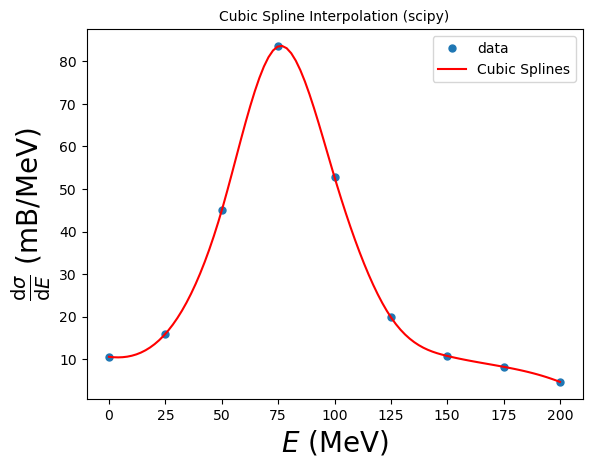

In [20]:
# and now let's plot: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$E$ (MeV)', fontsize=20) # set the x label
ax.set_ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}E}$ (mB/MeV)', fontsize=20) # set the y label 
ax.set_title('Cubic Spline Interpolation (scipy)', fontsize=10) # set the title 

# plot the data
ax.plot(xdata, ydata, label='data', lw=0,ms=5,marker='o') 
# plot the interpolations
ax.plot(xinterp, yinterp, label='Cubic Splines', color='red') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

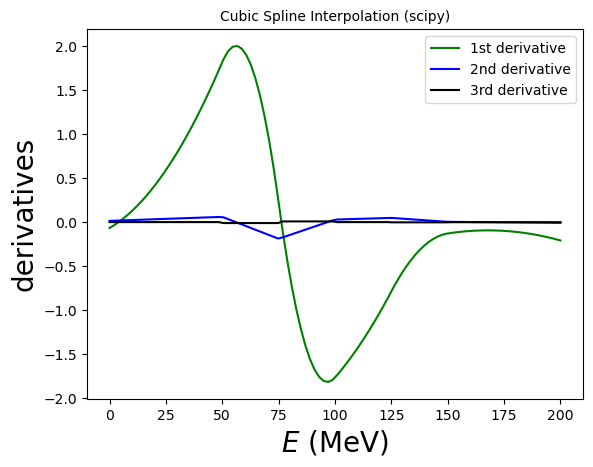

In [21]:
# You can also access the derivatives!

# and now let's plot: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$E$ (MeV)', fontsize=20) # set the x label
ax.set_ylabel(r'derivatives', fontsize=20) # set the y label 
ax.set_title('Cubic Spline Interpolation (scipy)', fontsize=10) # set the title 

# Plot the derivatives: 
# cs(xinterp, nu=1) calculates the first derivative, etc.
ax.plot(xinterp, cs(xinterp,nu=1), label='1st derivative', color='green') 
ax.plot(xinterp, cs(xinterp,nu=2), label='2nd derivative', color='blue') 
ax.plot(xinterp, cs(xinterp,nu=3), label='3rd derivative', color='black') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

### Other SciPy Interpolators

There are many other 1-D interpolating methods in SciPy's interpolate module: 

Cubic splines are by construction twice continuously differentiable. This may lead to the spline function oscillating and "overshooting" in between the data points. In these situations, an alternative is to use the so-called monotone cubic interpolants: these are constructed to be only once continuously differentiable, and attempt to preserve the local shape implied by the data. ```scipy.interpolate``` provides two objects of this kind: PchipInterpolator and Akima1DInterpolator:

In [22]:
ak = interpolate.Akima1DInterpolator(xdata, ydata) # Akima 1D interpolator
pc = interpolate.PchipInterpolator(xdata, ydata) # Pchip interpolator

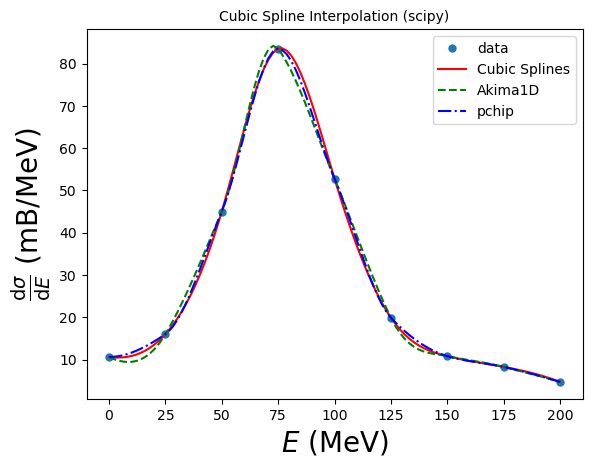

In [23]:
# and now let's plot: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$E$ (MeV)', fontsize=20) # set the x label
ax.set_ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}E}$ (mB/MeV)', fontsize=20) # set the y label 
ax.set_title('Cubic Spline Interpolation (scipy)', fontsize=10) # set the title 

# plot the data
ax.plot(xdata, ydata, label='data', lw=0,ms=5,marker='o') 
# plot the interpolations
ax.plot(xinterp, yinterp, label='Cubic Splines', color='red') 
ax.plot(xinterp, ak(xinterp), label='Akima1D', color='green', ls='--') 
ax.plot(xinterp, pc(xinterp), label='pchip', color='blue', ls='-.') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

B-splines form an alternative (if formally equivalent) representation of piecewise polynomials. This basis is generally more computationally stable than the power basis and is useful for a variety of applications which include interpolation, regression and curve representation. Details are given in the SciPy piecewise polynomials section (https://docs.scipy.org/doc/scipy/tutorial/interpolate/splines_and_polynomials.html#tutorial-interpolate-ppoly), and here we illustrate their usage:

In [24]:
# B-spline interpolator
bspl = interpolate.make_interp_spline(xdata, ydata, k=3)

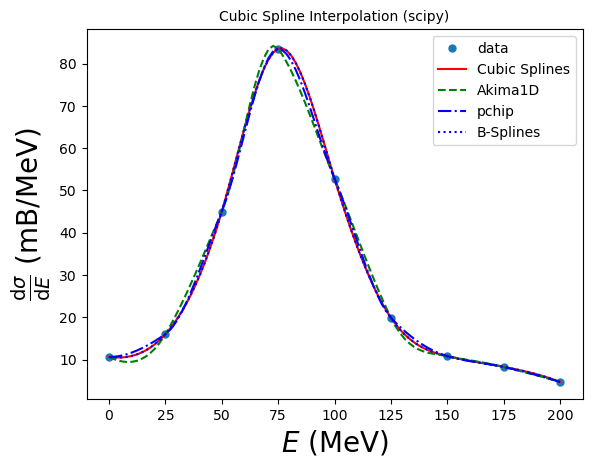

In [25]:
# and now let's plot: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$E$ (MeV)', fontsize=20) # set the x label
ax.set_ylabel(r'$\frac{\mathrm{d}\sigma}{\mathrm{d}E}$ (mB/MeV)', fontsize=20) # set the y label 
ax.set_title('Cubic Spline Interpolation (scipy)', fontsize=10) # set the title 

# plot the data
ax.plot(xdata, ydata, label='data', lw=0,ms=5,marker='o') 
# plot the interpolations
ax.plot(xinterp, yinterp, label='Cubic Splines', color='red') 
ax.plot(xinterp, ak(xinterp), label='Akima1D', color='green', ls='--') 
ax.plot(xinterp, pc(xinterp), label='pchip', color='blue', ls='-.') 
ax.plot(xinterp, bspl(xinterp), label='B-Splines', color='blue', ls=':') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

By default, the result of ```make_interp_spline(x, y)``` is equivalent to ```CubicSpline(x, y)```. The difference is that the former allows several optional capabilities, e.g. it can construct splines of various degrees (via the optional argument ```k```).

### Example 6.11: Global Temperature: Load data with Pandas and Interpolate with SciPy

Taken from: https://climate.nasa.gov/vital-signs/global-temperature/

This graph (data from: "No_Smoothing" column of https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt) shows the change in global surface temperature compared to the long-term average from 1951 to 1980. Earth’s average surface temperature in 2023 was the warmest on record since recordkeeping began in 1880 (source: NASA/GISS).  

Let's load the data using Python's ```pandas``` and interpolate them. We can use (very cautiously in this case -- this is not a model!) what the temperature *could* be in 2050. 

Note that the cubic splines will simply pass through all the points: we don't want that. Here we will see an example of interpolation with "smoothing". 

In [2]:
import pandas as pd # pandas is a useful and widely-used tool for data analysis

# load the data:
df = pd.read_csv('graph.txt', sep='\t') # '\t' represents tabs
# change the names to the expected ones
df.columns = ["Year", "Temp"]
# print to see how it looks like
print(df)

# we can access the columns as df["Year"] and df["Temp"]
# let's interpolate using various methods:
xinterp = np.arange(1880,2050,1)
# interpolators:
bspl = interpolate.make_interp_spline(df["Year"], df["Temp"], k=2)

# This will pass through all the points. We'd rather use something that generates smoothing:
spl = interpolate.splrep(df["Year"], df["Temp"], s=10) # s determines the degree of smoothing

# get the data points:
yinterp = bspl(xinterp) 
ysmooth = interpolate.splev(xinterp, spl, der=0)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
     Year  Temp
0    1881 -0.08
1    1882 -0.10
2    1883 -0.16
3    1884 -0.27
4    1885 -0.33
..    ...   ...
138  2019  0.98
139  2020  1.01
140  2021  0.84
141  2022  0.89
142  2023  1.17

[143 rows x 2 columns]


NameError: name 'np' is not defined

In [ ]:
# Let's plot them!
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'Year', fontsize=20) # set the x label
ax.set_ylabel(r'Temperature Anomaly vs. Average from 1951-1980 (C$^\circ$)', fontsize=10) # set the y label 
ax.set_title('Temperature Anomaly Interpolation')

# let's plot the pandas data:
ax.plot(df['Year'], df['Temp'], marker='o', ms=3)

# and the interpolations:
ax.plot(xinterp, yinterp, label='B-Splines', color='blue', ls=':') 
ax.plot(xinterp, ysmooth, label='Splines with smoothing', color='orange', ls='-') 

# set limits:
ax.set_ylim(-0.5,2)

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

In [ ]:
print("Extrapolated temperature anomaly in 2050:", ysmooth[-1])

As we will see later in this chapter, data with so much noise is better addressed by least-squares fitting with a theoretical prediction rather than an interpolator.

### 2-D Interpolation

You can also interpolate in multiple dimensions. Let's look at an example in 2D, i.e. two independent variables and one dependent variable that we wish to interpolate. 

E.g. we have the data: 

In [ ]:
# the data:
xdata = np.array([1,1,1,2,2,2,4,4,4])
ydata = np.array([1,2,3,1,2,3,1,2,3])
zdata = np.array([0,7,8,3,4,7,1,3,4])

# interpolating points:
xinterp = np.linspace(min(xdata), max(xdata))
yinterp = np.linspace(min(ydata), max(ydata))

# bivariate B-spline representation of a surface.
tck = interpolate.bisplrep(xdata, ydata, zdata, kx=1, ky=1, s=0)
# evaluate the interpolator: 
Z = interpolate.bisplev(xinterp, yinterp, tck)

# Now PLOT!
fig = plt.figure()
ax = fig.add_subplot(projection='3d') # if we want a 3D plot

# necessary for 2-D plot:
X, Y = np.meshgrid(xinterp, yinterp)
Z = Z.reshape(*X.shape).T

# plot the data:
ax.scatter(xdata, ydata, zdata,  'o', color='k', s=48)

# plot a wireframe of the interpolator:
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

### Least-Squares Fitting

Within the context of data fitting, it is important to emphasize three points:

1. If the data being fit contains errors, the "best-fit", in a statistical sense, should not pass through all the data points.
2. If the theory is not an appropriate one for the data, then its best fit to the data may not be a good fit at all. This is how we know that the theory is not right.
3. Only for the simplest case of a *linear* least-squares fit can we write down a closed-form solution to evaluate and obtain the fit. More realistic problems are usually solbed by trial-and-error search procedures.

Imagine that you measured $N_D$ data values of the dependent variable $y$ as a function of the independent variable $x$: 

$(x_i, y_i \pm \sigma_i)$; $i=1,...,N_D$,

where $\pm \sigma_i$ is the experimental uncertainty in the $i$-th value of $y$. 

For simplicity we will assume that errors occur in the dependent variable ($y$), altghough this is hardly ever true. 

**Our goal**: to determine how well a mathematical function $y=g(x)$ (i.e. the theory or model) can describe the data. 

Additionally: if the theory contains some parameters or constants, our goal can be viewed as determining the best values for these.

Therefore, we assume that the theory function $g(x)$, contains in addition to the functional dependence on $x$, an additional dependence on $N_P$ parameters: ${a_1, ..., a_{N_P}}$. These are *not* variables, but rather parts of the theoretical model. 

With these parameters, we can write the function as: 

$g(x) = g(x; \{a_1, a_2, ... , a_{N_P}\}) = g(x;\{a_m\})$, $m=1,...,N_P$,

where $\{a_m\}$ is the set of parameters ($m=1,...,N_P$) and $x$ is the independent variable. 

Statistics tells us that we can use the so-called "chi-square" variable as a gauge of how well a theoretical function $g$ reproduces the data:

$ \chi^2 = \sum_{i=1}^{N_D} \left( \frac{ y_i - g(x_i;\{a_m\}) } { \sigma_i } \right)^2$,

where the sum $i$ is taken over the $N_D$ experimental data points $(x_i, y_i \pm \sigma_i)$. 

Smaller values of $\chi^2$ imply better fits, with $\chi^2$ occurring if the theoretical curve went through the center of every data point (which never happens in practice!). 

The $1/\sigma_i^2$ weighting results in measurements with larger errors contributing less to $\chi^2$.

*Least-squares fitting* involves adjusting the parameters $\{a_m\}$ ($m=1,...,N_P$) until a *minimum* $\chi^2$ is found. 

This is the best fit possible, and the best way to determine the parameters in a theory. 

Therefore, the $N_P$ parameters $\{a_m\}$ that make the $\chi^2$ an extremum are found by solving the $N_P$ equations: 

$\frac{ \partial \chi^2 }{ \partial a_m } = 0$; $m=1,...,N_P$,

which imply that: 

$\sum_{i=1}^{N_D} \frac{ [y_i - g(x_i;\{a_m\})] } { \sigma_i^2 }\frac{ \partial g(x_i) }{ \partial a_m } = 0$, $m=1,...,N_P$. 

Often $g(x;\{a_m\})$ has a sufficiently complicated dependence on the values of the $\{a_m\}$ parameters to produce $N_P$ *simultaneous nonlinear* equations for the $\{a_m\}$ values. 

But we already know how to solve these! (Trial-and-error searching through the $N_p$-dimensional parameter space). 

To be safe, when such a search is completed, you need to check that the minimum of $\chi^2$ is a global one and not a local one. One way to do this is to repeat the search for a whole grid of starting values, and if different minima are found, to pick the one with the lowest $\chi^2$. 

When the deviations from theory are a result of random errors described by Gaussian distributions, there are some useful rules of thumb to remember:

- You know your fit is good if the value of $\chi^2$ calculated is approximately equal to the number of degrees of freedom, i.e. $\chi^2 \simeq N_D - N_P$, the difference between the number of data points and the number of parameters in your theory function.
- If $\chi^2 \ll N_D - N_P$, it does not mean you have a great theory or a really precise measurement; instead, you probably have *too many parameters* or have assigned errors ($\sigma_i$) that are too large (i.e. you *overestimated* the errors).
- if $\chi^2 \gg N_D - N_P$, the theory may not be good, or you may have significantly *underestimated* your errors, or you may have errors that are not random.

### Linear Regression 

The $N_P$ simultaneous equations can be simplified considerably if the functions $g(x;\{a_m\}$ depend *linearly* on the parameter values $a_m$, e.g.:

$g(x; a_1, a_2) = a_1 + a_2 x$. 

In this case, known as "linear regression", there are two parameters: the slope $a_2$ and the $y$-intercept $a_1$. 

Notice that, while there are only two parameters to determine, there still may be an arbitrary number of $N_D$ data points to fit. 

*Remember*: A unique solution *is not possible* unless the number of data points is greater than the number of parameters: $N_D \geq N_P$. 

For the linear case, there are only two derivatives to consider: 

$\frac{ \partial g } { \partial a_1 } = 1$, $\frac{ \partial g } { \partial a_2 } = x$.

After substitution, the $\chi^2$ minimization equations can be solved:

$a_1 = \frac{ S_{xx} S_y - S_x S_{xy} }{\Delta}$, $a_2 = \frac{S S_{xy} - S_x S_y}{\Delta}$, where:

$S = \sum_{i=1}^{N_D} \frac{1}{\sigma_i^2}$, 

$S_x = \sum_{i=1}^{N_D} \frac{x_i}{\sigma_i^2}$,

$S_y = \sum_{i=1}^{N_D} \frac{y_i}{\sigma_i^2}$,

$S_{xx} = \sum_{i=1}^{N_D} \frac{x_i^2}{\sigma_i^2}$,

$S_{xy} = \sum_{i=1}^{N_D} \frac{x_i y_i}{\sigma_i^2}$,

$\Delta = S S_{xx} - S_x^2$.

You can also get an expression for the variance (the square of the uncertainty) in the deduced parameters:

$\sigma_{a_1}^2 = \frac{ S_{xx}}{\Delta}$, $\sigma_{a_2} = \frac{S}{\Delta}$. 

This is a measure of the uncertainties in the values of the fitted parameters, arising from the uncertainties $\sigma_i$ in the measured $y_i$ values. 

A measure of the dependence of the parameters on each other is given by the *correlation coefficient*: 

$\rho(a_1, a_2) = \frac{ \mathrm{cov}(a_1, a_2) }{ \sigma_{a_1} \sigma_{a_2} }$, where:

$\mathrm{cov}(a_1, a_2) = \frac{ - S_x } { \Delta }$ is the covariance between $a_1$ and $a_2$.

The above analytic solutions  for the parametrs are of the form found in statistics textbooks, but are n ot optimal for numerical calculations: subtractive cancelation can make the answers unstable. As previously discussed, a rearrangement of the equations can decrease this kind of error. 

An improved set of expressions is given by:

$a_1 = \bar{y} - a_2 \bar{x}$, $a_2 = \frac{ S_{xy} } { S_{xx} }$, $\bar{x} = \frac{1}{N} \sum_{i=1}^{N_D} x_i$, $\bar{y} = \frac{1}{N} \sum_{i=1}^{N_D} y_i$, $S_{xy} = \sum_{i=1}^{N_D} \frac{(x_i - \bar{x}) (y_i - \bar{y})}{\sigma_i^2}$, $S_{xx} = \sum_{i=1}^{N_D} \frac{(x_i - \bar{x})^2}{\sigma_i^2}$

### Example 6.12: Hubble's Law

In 1929, Edwin Hubble examined the data related the radial velocity $v$ of 24 extra-galactic nebulae, to their distance $r$ from our galaxy. He fit them with a straight line: 

$ v = Hr$, where $H$ is now known as the Hubble constant. 

His measurements are given in the file ```hubble.txt```, where the first column represents the distance $r$ in Mpc (pc=parsec, defined as the distance at which 1 astronomical unit, the mean Earth-sun distance, subtends an angle of one arcsecond, i.e. 1/3600 of a degree), and the second column is the velocity $v$ in km/s. 

We will assume that the errors on $v$ are $\sigma =1~\mathrm{km/s}$, but we will re-evaluate this assumption later on. 

a) Load the file using ```pandas``` and plot the data using ```matplotlib```. 

b) Compute the least-squares straight-line fit to the data in the form: 

$v(r) = a + Hr$, 

including the errors on the parameters, $\sigma_a$ and $\sigma_H$. 

c) Plot your best fit along with the data. 

d) Determine the $\chi^2$ of the fit. Given its value, what would a better estimate of the average error on the measurements be? 

### Quadratic Fits

As long as the function being fitted depends *linearly* on the unknown parameters $a_i$, the condition of minimum $\chi^2$ leads to a set of simultaneous *linear* equations for the $a_m$'s that can be solved by hand or on a computer using matrix techniques. This is true if the function being fitted is a polynomial of any degree. 

E.g. suppose we want to fit the quadratic polynomial:

$g(x) = a_1 + a_2 x + a_3 x^2$, 

to the experimental measurements $(x_i, y_i \pm \sigma_i)$, $i=1,...,N_D$. 

Here, $g(x)$ is linear in all the parameters $a_m$, and we still only need to solve linear simultaneous equations, even though $x$ is raised to the second power. 

*In contrast*, if we were trying to fit a function of the form $g(x) = (a_1 + a_2) e^{-a_3 x}$ to the data, then we would need to solve nonlinear simultaneous equations (see next subsection). 

The best fit of a quadratic to the data is obtained by applying the minimum $\chi^2$ condition for $N_P = 3$ parameters and $N_D$ data points. 

$\frac{ \partial \chi^2 } { \partial a_m }$, $m=1,2,3$ leads to three simultaneous linear equations for $a_1$, $a_2$ and $a_3$: 

$\sum_{i=1}^{N_D} \frac{ [y_i - g(x_i;\{a_m\})] } { \sigma_i^2 }\frac{ \partial g(x_i) }{ \partial a_m } = 0$, $m=1,2,3$, with:

$\frac{ \partial g } { \partial a_1 } = 1$, $\frac{ \partial g } { \partial a_2 } = x$, $\frac{ \partial g } { \partial a_3 } = x^2$. 

The $a_m$ dependence only arises from the term in the square brackets in the sums. Since that term only has a linear dependence on the $a_m$'s, all the equations are linear in them.

The equations can be written as:

$S a_1 + S_x a_2 + S_{xx} a_3 = S_y$,

$S_x a_1 + S_{xx} a_2 + S_{xxx} a_3 = S_{xy}$,

$S_{xx} a_1 + S_{xxx} a_2 + S_{xxxx} a_3 = S_{xxy}$.

with $S = \sum_{i=1}^{N_D} \frac{1}{\sigma_i^2}$, $S_x = \sum_{i=1}^{N_D} \frac{x_i}{\sigma_i^2}$, $S_y = \sum_{i=1}^{N_D} \frac{y_i}{\sigma_i^2}$, $S_{xx} = \sum_{i=1}^{N_D} \frac{x_i^2}{\sigma_i^2}$, $S_{xy} = \sum_{i=1}^{N_D} \frac{x_i y_i}{\sigma_i^2}$, and so on. 

If we now define the vector of unknowns: 

$\vec{a} = \left(\begin{array}{c} 
a_{1}  \\
a_{2}  \\
a_{3} 
\end{array}\right)$,

the matrix: 

$\mathbf{A} = \left(\begin{array}{c} 
S & S_x & S_{xx}  \\
S_x & S_{xx} & S_{xxx}  \\
S_{xx} & S_{xxx} & S_{xxxx}  
\end{array}\right)$,

and: 

$\vec{b} = \left(\begin{array}{c} 
S_y  \\
S_{xy}  \\
S_{xxy} 
\end{array}\right)$,

then to get the coefficients $a_1, a_2, a_3$, we need to solve the matrix equation: 

$\mathbf{A} \vec{a} = \vec{b}$, for $\vec{a}$, using the techniques that we have previously discussed in this chapter.  


### Nonlinear Fitting

Earlier in this section we saw the Breit-Wigner resonance formula: 

$f(E) = \frac{ f_r } { (E-E_r)^2 + \Gamma^2 / 4 }$.

If we have a set of data that we wish to describe with such a formula, we would need to determine what values for the parameters $E_r$, $f_r$ and $\Gamma$ provide the best fit to the data. 

Since $f$ is a nonlinear function of the parameters, the equations that result from minimizing $\chi^2$ are *nonlinear* as well! 

But we already saw how to use the Newton-Raphson algorithm to search for solutions of simultaneous nonlinear equations. The method involved an expansion of the equations about the previous "guess" point, to obtain a set of linear equations, and then solving the linear equations with matrix libraries. 

In what follows, we will use the same combination of fitting, trial-and-error searching and matrix algebra, to conduct a nonlinear least-squares fit to the data. 

To get the best fit, we need t ofind values of the $N_P$ parameters $a_m$ in the theory $g(x; \{a_m\})$ that minimize:

$\chi^2 = \sum_{i=1}^{N_D} \left( \frac{ y - y_i }{\sigma_i}\right)^2$. 

This leads to the $N_P$ equations:

$\sum_{i=1}^{N_D} \frac{ [y_i - g(x_i; \{a_n\})] } { \sigma_i^2 } \frac{ \partial g(x_i; \{a_n\}) }{ \partial a_m }  = 0$, $m=1,...,N_P$. 

For the sake of simplicity, let's rewrite the theory function using the redefinitions:

$f_r \rightarrow a_1$, $E_r \rightarrow a_2$, $\Gamma^2/4 \rightarrow a_3$, $E\rightarrow x$ such that:

$g(x; a_1, a_2, a_3) = \frac{ a_1 } { (x-a_2)^2 + a_3 }$.

The derivatives required are then:

$\frac{ \partial g } { \partial a_1 } = \frac{ 1 } { (x-a_2)^2 + a_3 }$, $\frac{ \partial g } { \partial a_2 } = \frac{ -2 a_1 (x - a_2) }{[ (x-a_2)^2 + a_3]}$, $\frac{ \partial g } { \partial a_3 } =  \frac{ -a_1 } { [ (x-a_2)^2 + a_3]^2}$. 

Substituting into the best-fit condition yields three simultaneous nonlinear equations in $a_1, a_2, a_3$ that we need to solve in order to fit the $N_D$ data points. 

If all the errors are equal, we then have the following equations in the form that we require for the Newton-Raphson method, i.e. $f_i(a_1, a_2, ..., a_N) = 0$, $i=1,...,N$:

$f_1(a_1, a_2, a_3) = \sum_{i=1}^9 \frac{ y_i - g(x_i; a_1, a_2, a_3) } { (x_i - a_2)^2 + a_3 } = 0$,

$f_2(a_1, a_2, a_3) = \sum_{i=1}^9 \frac{ [y_i - g(x_i; a_1, a_2, a_3)] (x_i - a_2) } { [(x_i - a_2)^2 + a_3]^2 } = 0$,

$f_3(a_1, a_2, a_3) = \sum_{i=1}^9 \frac{ y_i - g(x_i; a_1, a_2, a_3) } { [(x_i - a_2)^2 + a_3]^2 } = 0$